# 2021/2022 Top5Bajnokság MiniElemzés

In [1]:
#importok
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import re
from datetime import datetime
#futási időhöz time
start=datetime.now()
#dark mode miatt plotstyle
plt.style.use('dark_background')

## Adatok betöltése

In [2]:
#raw data betöltésének függvénye
def loadData(file,leaguename,dropfrom):   
    league = pd.read_excel(file,sheet_name=leaguename)
    league.drop(league.iloc[:, dropfrom:], inplace = True, axis = 1)
    league['Winner'] = ''
    league.loc[(league['FTR'] == 'H'), 'Winner'] = league['HomeTeam']  
    league.loc[(league['FTR'] == 'D'), 'Winner'] = 'Draw'
    league.loc[(league['FTR'] == 'A'), 'Winner'] = league['AwayTeam']
    
    return league

In [3]:
#raw data betöltése excelből
file = 'all-euro-data-2021-2022.xlsx'

EPremierLeague = loadData(file,'E0',27)
EPremierLeague = EPremierLeague.drop(columns=['Referee'])

DBundesLiga = loadData(file,'D1',26)

SPLaLiga = loadData(file,'SP1',26)

ISeriaA = loadData(file,'I1',26)

FLigue1 = loadData(file,'F1',26)

In [4]:
#csapatlisták a későbbi iterálásokhoz
eplTeamList = ['Aston Villa', 'Arsenal', 'Brentford', 'Brighton', 'Burnley', 
            'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds',
            'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich',
            'Southampton', 'Tottenham', 'Watford', 'West Ham', 'Wolves']

dblTeamList = ['Augsburg', 'Bayern Munich', 'Bielefeld', 'Bochum', 'Dortmund', 
            'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Greuther Furth', 'Hertha',
            'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig',
            'Stuttgart', 'Union Berlin', 'Wolfsburg']

splTeamList = ['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 
            'Cadiz', 'Celta', 'Elche', 'Espanol', 'Getafe',
            'Granada', 'Levante', 'Mallorca', 'Osasuna', 'Real Madrid',
            'Sevilla', 'Sociedad', 'Valencia', 'Vallecano', 'Villarreal']

isaTeamList = ['Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 
            'Genoa', 'Inter', 'Juventus', 'Lazio', 'Milan',
            'Napoli', 'Roma', 'Salernitana', 'Sampdoria', 'Sassuolo',
            'Spezia', 'Torino', 'Udinese', 'Venezia', 'Verona']

fl1TeamList = ['Angers', 'Brest', 'Bordeaux', 'Clermont', 'Lens', 
            'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz',
            'Monaco', 'Montpellier', 'Nantes', 'Nice', 'Paris SG',
            'Reims', 'Rennes', 'St Etienne', 'Strasbourg', 'Troyes']

## Kölünböző táblázatok generálása

In [5]:
#Általános táblázat generálásának függvénye
def calculateStatsByParameter(league,team,param1,param2):
    
    HomeGames = league.loc[(league['HomeTeam'] == team)][param1]
    AwayGames = league.loc[(league['AwayTeam'] == team)][param2]
    AllGames = HomeGames.append(AwayGames, ignore_index=True)
      
    HomeAvg = round(HomeGames.mean(),1)
    HomeStd = round(HomeGames.std(),1)
    HomeMin = HomeGames.min() 
    Home25 = round(np.quantile(HomeGames, .25), 1)
    Home50 = round(np.quantile(HomeGames, .50), 1)
    Home75 = round(np.quantile(HomeGames, .75), 1)
    HomeMax = HomeGames.max()
    HomeSum = HomeGames.sum()
    
    HomeData = [team,HomeAvg,HomeStd,HomeMin,
                      Home25,Home50,Home75,HomeMax,HomeSum]
       
    AwayAvg = round(AwayGames.mean(),1)
    AwayStd = round(AwayGames.std(),1)
    AwayMin = AwayGames.min() 
    Away25 = round(np.quantile(AwayGames, .25), 1)
    Away50 = round(np.quantile(AwayGames, .50), 1)
    Away75 = round(np.quantile(AwayGames, .75), 1)
    AwayMax = AwayGames.max()
    AwaySum = AwayGames.sum()
    
    AwayData = [team,AwayAvg,AwayStd,AwayMin,
                      Away25,Away50,Away75,AwayMax,AwaySum]
    
    AllAvg = round(AllGames.mean(),1)
    AllStd = round(AllGames.std(),1)
    AllMin = AllGames.min() 
    All25 = round(np.quantile(AllGames, .25), 1)
    All50 = round(np.quantile(AllGames, .50), 1)
    All75 = round(np.quantile(AllGames, .75), 1)
    AllMax = AllGames.max()
    AllSum = AllGames.sum()
    
    AllData = [team,AllAvg,AllStd,AllMin,
                      All25,All50,All75,AllMax,AllSum]
    
    Data = {"Home": HomeData,"Away": AwayData,"All": AllData}
    return Data

### EredményTábla 

In [6]:
#EredményTábla függvényei
def team_tablestats(league,team): 
    
    HomeGames = league.loc[(league['HomeTeam'] == team)]
    AwayGames = league.loc[(league['AwayTeam'] == team)]
    AllGames = HomeGames.append(AwayGames, ignore_index=True)
    
    HomeMatchPlayed = len(HomeGames)
    HomeWins = len(HomeGames.loc[ HomeGames['Winner'] == team])
    HomeDraws = len(HomeGames.loc[ HomeGames['Winner'] == 'Draw'])
    HomeLoses = len(HomeGames.loc[ (HomeGames['Winner'] != team)  &  (HomeGames['Winner'] != 'Draw') ])
    HomeGoalsFor = HomeGames['FTHG'].sum()
    HomeGoalsAgainst = HomeGames['FTAG'].sum()
    HomeGoalDifference = HomeGoalsFor - HomeGoalsAgainst 
    HomePoints = HomeWins * 3 + HomeDraws
    HomeTableData = [team,HomeMatchPlayed,HomeWins,HomeDraws,HomeLoses,
                     HomeGoalsFor,HomeGoalsAgainst,HomeGoalDifference,HomePoints]
    
    AwayMatchPlayed = len(AwayGames)
    AwayWins = len(AwayGames.loc[ AwayGames['Winner'] == team])
    AwayDraws = len(AwayGames.loc[ AwayGames['Winner'] == 'Draw'])
    AwayLoses = len(AwayGames.loc[ (AwayGames['Winner'] != team)  &  (AwayGames['Winner'] != 'Draw') ])
    AwayGoalsFor = AwayGames['FTAG'].sum()
    AwayGoalsAgainst = AwayGames['FTHG'].sum()
    AwayGoalDifference = AwayGoalsFor - AwayGoalsAgainst
    AwayPoints = AwayWins * 3 + AwayDraws
    AwayTableData = [team,AwayMatchPlayed,AwayWins,AwayDraws,AwayLoses,
                     AwayGoalsFor,AwayGoalsAgainst,AwayGoalDifference,AwayPoints]
    
    AllPlayed = len(AllGames)    
    AllWins = HomeWins + AwayWins
    AllDraws = HomeDraws + AwayDraws
    AllLoses = HomeLoses + AwayLoses   
    AllGoalsFor = HomeGoalsFor + AwayGoalsFor    
    AllGoalsAgainst = HomeGoalsAgainst + AwayGoalsAgainst   
    AllGoalDifference = AllGoalsFor - AllGoalsAgainst   
    AllPoints  = AllWins * 3 + AllDraws
    AllTableData = [team,AllPlayed,AllWins,AllDraws,AllLoses,
                     AllGoalsFor,AllGoalsAgainst,AllGoalDifference,AllPoints]
       
    TeamTableData = {"Home": HomeTableData,"Away": AwayTableData,"All": AllTableData}
    return TeamTableData

def generateBasicTable(teamList,league,playtype):
    tableHead = pd.DataFrame(columns=['Team','MP','W','D','L','GF','GA','GD','Pts'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_tablestats(league,i)[playtype]
    return tableHead

def doPositionOrder(table):
    table = table.sort_values(by = ['Pts','GD','GF'], ascending=[0,0,0])
    table = table.reset_index()
    table = table.reset_index()
    table = table.drop(columns=['index'])
    table = table.rename(columns = {'level_0': 'Pos'}, inplace = False)
    table['Pos'] = table['Pos'] + 1    
    return table

In [7]:
#Eredménytáblák kigenerálása
#PremierLeagueTables
epl_HomeBasicTable = generateBasicTable(eplTeamList, EPremierLeague,'Home')
epl_HomeBasicTable = doPositionOrder(epl_HomeBasicTable)

epl_AwayBasicTable = generateBasicTable(eplTeamList, EPremierLeague,'Away')
epl_AwayBasicTable = doPositionOrder(epl_AwayBasicTable)

epl_AllBasicTable = generateBasicTable(eplTeamList, EPremierLeague,'All')
epl_AllBasicTable = doPositionOrder(epl_AllBasicTable)


#Ligue1Tables
fl1_HomeBasicTable = generateBasicTable(fl1TeamList, FLigue1,'Home')
fl1_HomeBasicTable = doPositionOrder(fl1_HomeBasicTable)

fl1_AwayBasicTable = generateBasicTable(fl1TeamList, FLigue1,'Away')
fl1_AwayBasicTable = doPositionOrder(fl1_AwayBasicTable)

fl1_AllBasicTable = generateBasicTable(fl1TeamList, FLigue1,'All')
fl1_AllBasicTable = doPositionOrder(fl1_AllBasicTable)


#BundesligaTables
dbl_HomeBasicTable = generateBasicTable(dblTeamList, DBundesLiga,'Home')
dbl_HomeBasicTable = doPositionOrder(dbl_HomeBasicTable)

dbl_AwayBasicTable = generateBasicTable(dblTeamList, DBundesLiga,'Away')
dbl_AwayBasicTable = doPositionOrder(dbl_AwayBasicTable)

dbl_AllBasicTable = generateBasicTable(dblTeamList, DBundesLiga,'All')
dbl_AllBasicTable = doPositionOrder(dbl_AllBasicTable)


#LaLigaTables
spl_HomeBasicTable = generateBasicTable(splTeamList, SPLaLiga,'Home')
spl_HomeBasicTable = doPositionOrder(spl_HomeBasicTable)

spl_AwayBasicTable = generateBasicTable(splTeamList, SPLaLiga,'Away')
spl_AwayBasicTable = doPositionOrder(spl_AwayBasicTable)

spl_AllBasicTable = generateBasicTable(splTeamList, SPLaLiga,'All')
spl_AllBasicTable = doPositionOrder(spl_AllBasicTable)
    

#SeariaATables
isa_HomeBasicTable = generateBasicTable(isaTeamList, ISeriaA,'Home')
isa_HomeBasicTable = doPositionOrder(isa_HomeBasicTable)

isa_AwayBasicTable = generateBasicTable(isaTeamList, ISeriaA,'Away')
isa_AwayBasicTable = doPositionOrder(isa_AwayBasicTable)

isa_AllBasicTable = generateBasicTable(isaTeamList, ISeriaA,'All')
isa_AllBasicTable = doPositionOrder(isa_AllBasicTable)

### SzögletTábla

In [8]:
#SzögletTábla függvényei
def team_cornerstats(league,team):
    
    Data = calculateStatsByParameter(league,team,'HC','AC')
    return Data
    
def generateCornerTable(teamList,league,playtype):
    tableHead = pd.DataFrame(columns=['Team','Mean','Std','Min','25%','50%','75%','Max','Sum'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_cornerstats(league,i)[playtype]
    return tableHead

In [9]:
#SzögletTáblák kigenerálása
#PremierLeagueCornerTables
epl_HomeCornerTable = generateCornerTable(eplTeamList, EPremierLeague,'Home')
epl_AwayCornerTable = generateCornerTable(eplTeamList, EPremierLeague,'Away')
epl_AllCornerTable = generateCornerTable(eplTeamList, EPremierLeague,'All')

#Ligue1CornerTables
fl1_HomeCornerTable = generateCornerTable(fl1TeamList, FLigue1,'Home')
fl1_AwayCornerTable = generateCornerTable(fl1TeamList, FLigue1,'Away')
fl1_AllCornerTable = generateCornerTable(fl1TeamList, FLigue1,'All')

#BundesLigaCornerTables
dbl_HomeCornerTable = generateCornerTable(dblTeamList, DBundesLiga,'Home')
dbl_AwayCornerTable = generateCornerTable(dblTeamList, DBundesLiga,'Away')
dbl_AllCornerTable = generateCornerTable(dblTeamList, DBundesLiga,'All')

#LaLigaCornerTables
spl_HomeCornerTable = generateCornerTable(splTeamList, SPLaLiga,'Home')
spl_AwayCornerTable = generateCornerTable(splTeamList, SPLaLiga,'Away')
spl_AllCornerTable = generateCornerTable(splTeamList, SPLaLiga,'All')

#SeriaACornerTables
isa_HomeCornerTable = generateCornerTable(isaTeamList, ISeriaA,'Home')
isa_AwayCornerTable = generateCornerTable(isaTeamList, ISeriaA,'Away')
isa_AllCornerTable = generateCornerTable(isaTeamList, ISeriaA,'All')

### LövésTábla

In [10]:
#LövésTábla függvénye
def team_shotstats(league,team):
    
    Data = calculateStatsByParameter(league,team,'HS','AS')
    return Data
    
def generateShotTable(teamList,league,playtype):
    tableHead = pd.DataFrame(columns=['Team','Mean','Std','Min','25%','50%','75%','Max','Sum'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_shotstats(league,i)[playtype]
    return tableHead

In [11]:
#LövésTáblák kigenerálása
#PremierLeagueShotTables
epl_HomeShotTable = generateShotTable(eplTeamList, EPremierLeague,'Home')
epl_AwayShotTable = generateShotTable(eplTeamList, EPremierLeague,'Away')
epl_AllShotTable = generateShotTable(eplTeamList, EPremierLeague,'All')

#Ligue1ShotTables
fl1_HomeShotTable = generateShotTable(fl1TeamList, FLigue1,'Home')
fl1_AwayShotTable = generateShotTable(fl1TeamList, FLigue1,'Away')
fl1_AllShotTable = generateShotTable(fl1TeamList, FLigue1,'All')

#BundesLigaShotTables
dbl_HomeShotTable = generateShotTable(dblTeamList, DBundesLiga,'Home')
dbl_AwayShotTable = generateShotTable(dblTeamList, DBundesLiga,'Away')
dbl_AllShotTable = generateShotTable(dblTeamList, DBundesLiga,'All')

#LaLigaShotTables
spl_HomeShotTable = generateShotTable(splTeamList, SPLaLiga,'Home')
spl_AwayShotTable = generateShotTable(splTeamList, SPLaLiga,'Away')
spl_AllShotTable = generateShotTable(splTeamList, SPLaLiga,'All')

#SeriaAShotTables
isa_HomeShotTable = generateShotTable(isaTeamList, ISeriaA,'Home')
isa_AwayShotTable = generateShotTable(isaTeamList, ISeriaA,'Away')
isa_AllShotTable = generateShotTable(isaTeamList, ISeriaA,'All')

### KapuralövésTábla

In [12]:
#KapuralövésTábla függvénye
def team_shotOnTargetstats(league,team):
    
    Data = calculateStatsByParameter(league,team,'HST','AST')
    return Data
    
def generateShotOnTargetTable(teamList,league,playtype):
    tableHead = pd.DataFrame(columns=['Team','Mean','Std','Min','25%','50%','75%','Max','Sum'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_shotOnTargetstats(league,i)[playtype]
    return tableHead

In [13]:
#KapuralövésTáblák kigenerálása
#PremierLeagueShotOnTargetTables
epl_HomeShotOnTargetTable = generateShotOnTargetTable(eplTeamList, EPremierLeague,'Home')
epl_AwayShotOnTargetTable = generateShotOnTargetTable(eplTeamList, EPremierLeague,'Away')
epl_AllShotOnTargetTable = generateShotOnTargetTable(eplTeamList, EPremierLeague,'All')

#Ligue1ShotOnTargetTables
fl1_HomeShotOnTargetTable = generateShotOnTargetTable(fl1TeamList, FLigue1,'Home')
fl1_AwayShotOnTargetTable = generateShotOnTargetTable(fl1TeamList, FLigue1,'Away')
fl1_AllShotOnTargetTable = generateShotOnTargetTable(fl1TeamList, FLigue1,'All')

#BundesLigaShotOnTargetTables
dbl_HomeShotOnTargetTable = generateShotOnTargetTable(dblTeamList, DBundesLiga,'Home')
dbl_AwayShotOnTargetTable = generateShotOnTargetTable(dblTeamList, DBundesLiga,'Away')
dbl_AllShotOnTargetTable = generateShotOnTargetTable(dblTeamList, DBundesLiga,'All')

#LaLigaShotOnTargetTables
spl_HomeShotOnTargetTable = generateShotOnTargetTable(splTeamList, SPLaLiga,'Home')
spl_AwayShotOnTargetTable = generateShotOnTargetTable(splTeamList, SPLaLiga,'Away')
spl_AllShotOnTargetTable = generateShotOnTargetTable(splTeamList, SPLaLiga,'All')

#SeriaAShotOnTargetTables
isa_HomeShotOnTargetTable = generateShotOnTargetTable(isaTeamList, ISeriaA,'Home')
isa_AwayShotOnTargetTable = generateShotOnTargetTable(isaTeamList, ISeriaA,'Away')
isa_AllShotOnTargetTable = generateShotOnTargetTable(isaTeamList, ISeriaA,'All')

### BüntetőlapTábla

In [14]:
#BüntetőlapTábla függvénye
def team_YellowCardstats(league,team):
    
    Data = calculateStatsByParameter(league,team,'HY','AY')
    return Data
    
def generateYellowCardTable(teamList,league,playtype):
    tableHead = pd.DataFrame(columns=['Team','Mean','Std','Min','25%','50%','75%','Max','Sum'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_YellowCardstats(league,i)[playtype]
    return tableHead

In [15]:
#BüntetőlapTáblák kigenerálása
#PremierLeagueYellowCardTables
epl_HomeYellowCardTable = generateYellowCardTable(eplTeamList, EPremierLeague,'Home')
epl_AwayYellowCardTable = generateYellowCardTable(eplTeamList, EPremierLeague,'Away')
epl_AllYellowCardTable = generateYellowCardTable(eplTeamList, EPremierLeague,'All')

#Ligue1YellowCardTables
fl1_HomeYellowCardTable = generateYellowCardTable(fl1TeamList, FLigue1,'Home')
fl1_AwayYellowCardTable = generateYellowCardTable(fl1TeamList, FLigue1,'Away')
fl1_AllYellowCardTable = generateYellowCardTable(fl1TeamList, FLigue1,'All')

#BundesLigaYellowCardTables
dbl_HomeYellowCardTable = generateYellowCardTable(dblTeamList, DBundesLiga,'Home')
dbl_AwayYellowCardTable = generateYellowCardTable(dblTeamList, DBundesLiga,'Away')
dbl_AllYellowCardTable = generateYellowCardTable(dblTeamList, DBundesLiga,'All')

#LaLigaYellowCardTables
spl_HomeYellowCardTable = generateYellowCardTable(splTeamList, SPLaLiga,'Home')
spl_AwayYellowCardTable = generateYellowCardTable(splTeamList, SPLaLiga,'Away')
spl_AllYellowCardTable = generateYellowCardTable(splTeamList, SPLaLiga,'All')

#SeriaAYellowCardTables
isa_HomeYellowCardTable = generateYellowCardTable(isaTeamList, ISeriaA,'Home')
isa_AwayYellowCardTable = generateYellowCardTable(isaTeamList, ISeriaA,'Away')
isa_AllYellowCardTable = generateYellowCardTable(isaTeamList, ISeriaA,'All')

In [16]:
#Ligánkénti táblázatok gyűjteménye
epl_TableCollection = {"HomeBasic":epl_HomeBasicTable,
                       "AwayBasic":epl_AwayBasicTable,
                       "AllBasic":epl_AllBasicTable,
                       "HomeCorner":epl_HomeCornerTable,
                       "AwayCorner":epl_AwayCornerTable,
                       "AllCorner":epl_AllCornerTable,
                       "HomeShot":epl_HomeShotTable,
                       "AwayShot":epl_AwayShotTable,
                       "AllShot":epl_AllShotTable,
                       "HomeShotOnTarget":epl_HomeShotOnTargetTable,
                       "AwayShotOnTarget":epl_AwayShotOnTargetTable,
                       "AllShotOnTarget":epl_AllShotOnTargetTable,
                       "HomeYellowCard":epl_HomeYellowCardTable,
                       "AwayYellowCard":epl_AwayYellowCardTable,
                       "AllYellowCard":epl_AllYellowCardTable}

fl1_TableCollection = {"HomeBasic":fl1_HomeBasicTable,
                       "AwayBasic":fl1_AwayBasicTable,
                       "AllBasic":fl1_AllBasicTable,
                       "HomeCorner":fl1_HomeCornerTable,
                       "AwayCorner":fl1_AwayCornerTable,
                       "AllCorner":fl1_AllCornerTable,
                       "HomeShot":fl1_HomeShotTable,
                       "AwayShot":fl1_AwayShotTable,
                       "AllShot":fl1_AllShotTable,
                       "HomeShotOnTarget":fl1_HomeShotOnTargetTable,
                       "AwayShotOnTarget":fl1_AwayShotOnTargetTable,
                       "AllShotOnTarget":fl1_AllShotOnTargetTable,
                       "HomeYellowCard":fl1_HomeYellowCardTable,
                       "AwayYellowCard":fl1_AwayYellowCardTable,
                       "AllYellowCard":fl1_AllYellowCardTable}

dbl_TableCollection = {"HomeBasic":dbl_HomeBasicTable,
                       "AwayBasic":dbl_AwayBasicTable,
                       "AllBasic":dbl_AllBasicTable,
                       "HomeCorner":dbl_HomeCornerTable,
                       "AwayCorner":dbl_AwayCornerTable,
                       "AllCorner":dbl_AllCornerTable,
                       "HomeShot":dbl_HomeShotTable,
                       "AwayShot":dbl_AwayShotTable,
                       "AllShot":dbl_AllShotTable,
                       "HomeShotOnTarget":dbl_HomeShotOnTargetTable,
                       "AwayShotOnTarget":dbl_AwayShotOnTargetTable,
                       "AllShotOnTarget":dbl_AllShotOnTargetTable,
                       "HomeYellowCard":dbl_HomeYellowCardTable,
                       "AwayYellowCard":dbl_AwayYellowCardTable,
                       "AllYellowCard":dbl_AllYellowCardTable}

spl_TableCollection = {"HomeBasic":spl_HomeBasicTable,
                       "AwayBasic":spl_AwayBasicTable,
                       "AllBasic":spl_AllBasicTable,
                       "HomeCorner":spl_HomeCornerTable,
                       "AwayCorner":spl_AwayCornerTable,
                       "AllCorner":spl_AllCornerTable,
                       "HomeShot":spl_HomeShotTable,
                       "AwayShot":spl_AwayShotTable,
                       "AllShot":spl_AllShotTable,
                       "HomeShotOnTarget":spl_HomeShotOnTargetTable,
                       "AwayShotOnTarget":spl_AwayShotOnTargetTable,
                       "AllShotOnTarget":spl_AllShotOnTargetTable,
                       "HomeYellowCard":spl_HomeYellowCardTable,
                       "AwayYellowCard":spl_AwayYellowCardTable,
                       "AllYellowCard":spl_AllYellowCardTable}                       

isa_TableCollection = {"HomeBasic":isa_HomeBasicTable,
                       "AwayBasic":isa_AwayBasicTable,
                       "AllBasic":isa_AllBasicTable,
                       "HomeCorner":isa_HomeCornerTable,
                       "AwayCorner":isa_AwayCornerTable,
                       "AllCorner":isa_AllCornerTable,
                       "HomeShot":isa_HomeShotTable,
                       "AwayShot":isa_AwayShotTable,
                       "AllShot":isa_AllShotTable,
                       "HomeShotOnTarget":isa_HomeShotOnTargetTable,
                       "AwayShotOnTarget":isa_AwayShotOnTargetTable,
                       "AllShotOnTarget":isa_AllShotOnTargetTable,
                       "HomeYellowCard":isa_HomeYellowCardTable,
                       "AwayYellowCard":isa_AwayYellowCardTable,
                       "AllYellowCard":isa_AllYellowCardTable}                       

## Grafikonok és elemzések

In [17]:
#Meccsre lebontott statisztikai adatok függvénye
def game(homeTeam,awayTeam,collection):
    
    a = collection['AllBasic'].loc[(collection['AllBasic']['Team'] == homeTeam)]
    b = collection['AllBasic'].loc[(collection['AllBasic']['Team'] == awayTeam)]
    onBasicTable = a.append(b,ignore_index=True)
    onBasicTable = onBasicTable.sort_values(by = ['Pts'], ascending=[0])                                           
    print('2 csapat összesített táblázaton elfoglalt helye:')
    display(onBasicTable)
    
#     c = collection['HomeBasic'].loc[(collection['HomeBasic']['Team'] == homeTeam)]
#     d = collection['AwayBasic'].loc[(collection['AwayBasic']['Team'] == awayTeam)]
#     onPlaceBasicTable = c.append(d,ignore_index=True)  
#     onPlaceBasicTable = onPlaceBasicTable.sort_values(by = ['Pts'], ascending=[0])
#     print('2 csapat hazai/vendég táblázaton elfoglalt helye:')
#     display(onPlaceBasicTable)
    
    e = collection['AllCorner'].loc[(collection['AllCorner']['Team'] == homeTeam)]
    f = collection['AllCorner'].loc[(collection['AllCorner']['Team'] == awayTeam)]
    onCornerTable = e.append(f,ignore_index=True)
    print('2 csapat szöglet táblázatos adatai:')
    display(onCornerTable)
    
#     g = collection['HomeCorner'].loc[(collection['HomeCorner']['Team'] == homeTeam)]
#     h = collection['AwayCorner'].loc[(collection['AwayCorner']['Team'] == awayTeam)]
#     onPlaceCornerTable = g.append(h,ignore_index=True)
#     print('2 csapat hazai/vendég táblázatos adatai:')
#     display(onPlaceCornerTable)
    
    i = collection['AllShot'].loc[(collection['AllShot']['Team'] == homeTeam)]
    j = collection['AllShot'].loc[(collection['AllShot']['Team'] == awayTeam)]
    onShotTable = i.append(j,ignore_index=True)
    print('2 csapat lövés táblázatos adatai:')
    display(onShotTable)
    
#     k = collection['HomeShot'].loc[(collection['HomeShot']['Team'] == homeTeam)]
#     l = collection['AwayShot'].loc[(collection['AwayShot']['Team'] == awayTeam)]
#     onPlaceShotTable = k.append(l,ignore_index=True)
#     print('2 csapat hazai/vendég táblázatos adatai:')
#     display(onPlaceShotTable)
    
    m = collection['AllShotOnTarget'].loc[(collection['AllShotOnTarget']['Team'] == homeTeam)]
    n = collection['AllShotOnTarget'].loc[(collection['AllShotOnTarget']['Team'] == awayTeam)]
    onShotOnTargetTable = m.append(n,ignore_index=True)
    print('2 csapat kapuralövés táblázatos adatai:')
    display(onShotOnTargetTable)
    
#     o = collection['HomeShotOnTarget'].loc[(collection['HomeShotOnTarget']['Team'] == homeTeam)]
#     p = collection['AwayShotOnTarget'].loc[(collection['AwayShotOnTarget']['Team'] == awayTeam)]
#     onPlaceShotOnTArgetTable = o.append(p,ignore_index=True)
#     print('2 csapat hazai/vendég táblázatos adatai:')
#     display(onPlaceShotOnTArgetTable)
    
    q = collection['AllYellowCard'].loc[(collection['AllYellowCard']['Team'] == homeTeam)]
    r = collection['AllYellowCard'].loc[(collection['AllYellowCard']['Team'] == awayTeam)]
    onYellowCardTable = q.append(r,ignore_index=True)
    print('2 csapat sárgalap táblázatos adatai:')
    display(onYellowCardTable)
    
#     s = collection['HomeYellowCard'].loc[(collection['HomeYellowCard']['Team'] == homeTeam)]
#     t = collection['AwayYellowCard'].loc[(collection['AwayYellowCard']['Team'] == awayTeam)]
#     onPlaceYellowCardTable = s.append(t,ignore_index=True)
#     print('2 csapat hazai/vendég táblázatos adatai:')
#     display(onPlaceYellowCardTable)

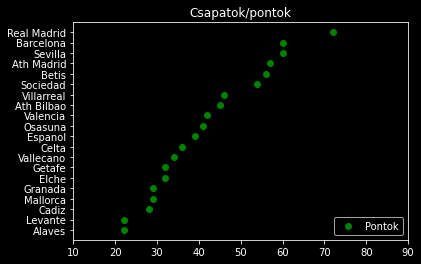

In [18]:
#RandomPlot1
x = np.array(spl_AllBasicTable['Pts'][::-1])
y = np.array(spl_AllBasicTable['Team'][::-1])

plt.title("Csapatok/pontok")
plt.scatter(x ,y, color="green", label = 'Pontok')
plt.xticks(list(range(10, 100,10)))
plt.legend(loc='lower right')
plt.show()

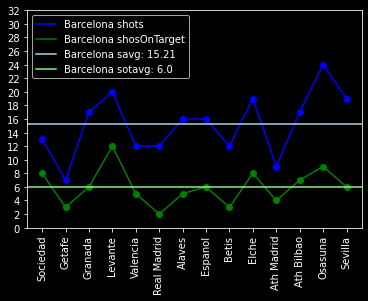

In [19]:
#RandomPlot2
a = SPLaLiga.loc[(SPLaLiga['HomeTeam'] == 'Barcelona')]['HS']
c = SPLaLiga.loc[(SPLaLiga['HomeTeam'] == 'Barcelona')]['HST']
d = SPLaLiga.loc[(SPLaLiga['HomeTeam'] == 'Barcelona')]['AwayTeam']
# b = SPLaLiga.loc[(SPLaLiga['AwayTeam'] == 'Real Madrid')]['AC']

asd = a.tolist()
# bsd = b.tolist()
csd = c.tolist()
asdd = d.tolist()

plt.plot(asdd,asd,color='blue',label = 'Barcelona shots')
plt.plot(asd,'or',color='blue')

plt.plot(csd,color='green',label = 'Barcelona shosOnTarget')
plt.plot(csd,'or',color='green')

# plt.plot(bsd,color='red',label = 'Real Madrid')
# plt.plot(bsd,'or',color='red')

avga = round(a.mean(),2)
# avgb = round(b.mean(),2)
avgc = round(c.mean(),2)
plt.axhline(y=avga, color='lightblue', linestyle='-',label = 'Barcelona savg: ' + str(avga))
plt.axhline(y=avgc, color='lightgreen', linestyle='-',label = 'Barcelona sotavg: ' + str(avgc))
#plt.axhline(y=avgb, color='r', linestyle='-',label = 'Real Madrid avg')

plt.xticks(list(range(0, len(a))),rotation = 90,color = 'white')
plt.yticks(list(range(0, max(a)+10,2)),color = 'white')
plt.legend()
plt.show()

### Csapatok pontszerzései fordulónként grafikon

In [20]:
#függvények
def pointsByTeam(league,team):
    hg = league.loc[(league['HomeTeam'] == team)][['Date','Winner']]
    ag = league.loc[(league['AwayTeam'] == team)][['Date','Winner']]
    allg = hg.append(ag,ignore_index=True)
    allg = allg.sort_values(by = ['Date'],ascending=[1])
    results = allg['Winner']
    
    point = 0
    c = 0
    Points = list(range(0,len(results)))
    for i in results:
        if(i == team):
            point = point + 3
        elif(i == 'Draw'):
            point = point + 1
        else:
            point = point + 0
            
        Points[c] = point
        c = c + 1
        
    return Points

def plotTeamPoints(teamList,league):
    count = 0
    plt.figure(figsize=(16,12))
    plt.title("Csapatok pontjai fordulónként")
    color=iter(cm.rainbow(np.linspace(0,1,20)))
    for i in teamList:
        c=next(color)
        data = pointsByTeam(league,i)
        plt.plot(data,color=c,linestyle='dashed',label = i)
        plt.plot(data,"o",markersize=5,color=c)
        plt.legend(prop={'size': 15})

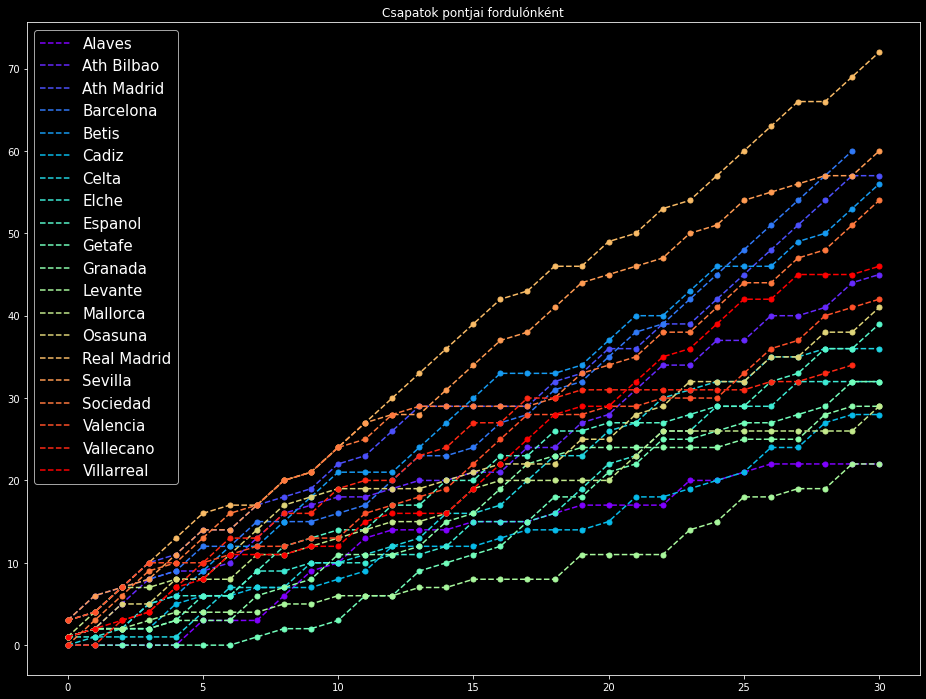

In [21]:
plotTeamPoints(splTeamList,SPLaLiga)

### FogadásiTáblázatok

In [22]:
#Szükséges függvények
def szazalek(league,team,type1,type2,l):
    hg = league.loc[(league['HomeTeam'] == team)][type1]
    ag = league.loc[(league['AwayTeam'] == team)][type2]
    allg = hg.append(ag,ignore_index=True)
    
    chanceh = list(range(0,l))
    chance = list(range(0,l))
    
    for i in list(range(0,l)):
        csd = len(allg[allg > i + 0.5])
        dsd = len(allg)
        chance[i] =(csd / dsd)*100
        chance[i] = round(chance[i],2)
        
    return chance

def condition(v):
    if v < 33:
        return str(v) + '%'
    elif v < 66:
        return str(v) + '%'
    return str(v) + '%'

def make_pretty(styler):
#     styler.set_caption("Goals percentage")
    styler.format(condition)
    styler.background_gradient(axis=None, vmin=0, vmax=100, cmap='Greens')
    return styler

In [23]:
#gólfüggvény
def generate_goal_per(league,team1,team2,l):
    
    team1line = szazalek(league,team1,'FTHG','FTAG',l)
    team2line = szazalek(league,team2,'FTHG','FTAG',l)
    
    df = pd.DataFrame(columns=['Over 0,5','Over 1,5','Over 2,5','Over 3,5','Over 4,5','Over 5,5'])
    
    df.loc[(len(df.index))] = team1line
    df.loc[(len(df.index))] = team2line
    df = df.rename(index={0: team1, 1: team2})
    df = df.T    
    df = df.style.pipe(make_pretty)   
    print('Gólok')
    display(df)

In [24]:
#lövésfüggvény
def generate_shot_per(league,team1,team2,l):
    
    team1line = szazalek(league,team1,'HS','AS',l)
    team2line = szazalek(league,team2,'HS','AS',l)

    df = pd.DataFrame(columns=['Over 0,5','Over 1,5','Over 2,5','Over 3,5','Over 4,5',
                              'Over 5,5','Over 6,5','Over 7,5','Over 8,5','Over 9,5',
                              'Over 10,5','Over 11,5','Over 12,5','Over 13,5','Over 14,5',
                              'Over 15,5','Over 16,5','Over 17,5','Over 18,5','Over 19,5',
                              'Over 20,5','Over 21,5','Over 22,5','Over 23,5','Over 24,5'])                              
    
    df.loc[(len(df.index))] = team1line
    df.loc[(len(df.index))] = team2line
    df = df.rename(index={0: team1, 1: team2})
    df = df.T   
    df = df.style.pipe(make_pretty)
    print('Lövések')
    display(df)

In [25]:
#kapuralövésfüggvény
def generate_shotontarget_per(league,team1,team2,l):
    
    team1line = szazalek(league,team1,'HST','AST',l)
    team2line = szazalek(league,team2,'HST','AST',l)
    
    df = pd.DataFrame(columns=['Over 0,5','Over 1,5','Over 2,5','Over 3,5','Over 4,5',
                              'Over 5,5','Over 6,5','Over 7,5','Over 8,5','Over 9,5',
                              'Over 10,5','Over 11,5','Over 12,5','Over 13,5','Over 14,5'])
    
    df.loc[(len(df.index))] = team1line
    df.loc[(len(df.index))] = team2line
    df = df.rename(index={0: team1, 1: team2})
    df = df.T   
    df = df.style.pipe(make_pretty)
    print('Kapuralövések')
    display(df)

In [26]:
#szögletfüggvény
def generate_corner_per(league,team1,team2,l):
    
    team1line = szazalek(league,team1,'HC','AC',l)
    team2line = szazalek(league,team2,'HC','AC',l)
    
    df = pd.DataFrame(columns=['Over 0,5','Over 1,5','Over 2,5','Over 3,5','Over 4,5',
                              'Over 5,5','Over 6,5','Over 7,5','Over 8,5','Over 9,5',
                              'Over 10,5','Over 11,5','Over 12,5','Over 13,5','Over 14,5'])
    
    df.loc[(len(df.index))] = team1line
    df.loc[(len(df.index))] = team2line
    df = df.rename(index={0: team1, 1: team2})
    df = df.T   
    df = df.style.pipe(make_pretty)
    print('Szögletek')
    display(df)

In [27]:
#sárgalapfüggvény
def generate_yellowcard_per(league,team1,team2,l):
    
    team1line = szazalek(league,team1,'HY','AY',6)
    team2line = szazalek(league,team2,'HY','AY',6)

    df = pd.DataFrame(columns=['Over 0,5','Over 1,5','Over 2,5','Over 3,5','Over 4,5','Over 5,5'])

    df.loc[(len(df.index))] = team1line
    df.loc[(len(df.index))] = team2line
    df = df.rename(index={0: team1, 1:team2})
    df = df.T
    df = df.style.pipe(make_pretty)    
    print('Sárgalapok')
    display(df)

In [41]:
def displaystats(league,team1,team2):
    generate_goal_per(league,team1,team2,6)

    generate_shot_per(league,team1,team2,25)

    generate_shotontarget_per(league,team1,team2,15)

    generate_corner_per(league,team1,team2,15)

    generate_yellowcard_per(league,team1,team2,6)
    
displaystats(ISeriaA,'Milan','Genoa')

Gólok


,Milan,Genoa
"Over 0,5",87.5%,50.0%
"Over 1,5",50.0%,18.75%
"Over 2,5",28.12%,6.25%
"Over 3,5",9.38%,0.0%
"Over 4,5",0.0%,0.0%
"Over 5,5",0.0%,0.0%


Lövések


,Milan,Genoa
"Over 0,5",100.0%,96.88%
"Over 1,5",100.0%,90.62%
"Over 2,5",100.0%,90.62%
"Over 3,5",100.0%,87.5%
"Over 4,5",100.0%,81.25%
"Over 5,5",100.0%,81.25%
"Over 6,5",100.0%,81.25%
"Over 7,5",100.0%,68.75%
"Over 8,5",96.88%,65.62%
"Over 9,5",93.75%,56.25%


Kapuralövések


,Milan,Genoa
"Over 0,5",100.0%,90.62%
"Over 1,5",96.88%,81.25%
"Over 2,5",87.5%,62.5%
"Over 3,5",68.75%,37.5%
"Over 4,5",53.12%,15.62%
"Over 5,5",31.25%,9.38%
"Over 6,5",31.25%,6.25%
"Over 7,5",12.5%,0.0%
"Over 8,5",0.0%,0.0%
"Over 9,5",0.0%,0.0%


Szögletek


,Milan,Genoa
"Over 0,5",100.0%,93.75%
"Over 1,5",96.88%,81.25%
"Over 2,5",90.62%,65.62%
"Over 3,5",81.25%,50.0%
"Over 4,5",59.38%,37.5%
"Over 5,5",31.25%,25.0%
"Over 6,5",25.0%,18.75%
"Over 7,5",12.5%,12.5%
"Over 8,5",9.38%,6.25%
"Over 9,5",3.12%,6.25%


Sárgalapok


,Milan,Genoa
"Over 0,5",87.5%,90.62%
"Over 1,5",56.25%,84.38%
"Over 2,5",31.25%,53.12%
"Over 3,5",18.75%,21.88%
"Over 4,5",3.12%,0.0%
"Over 5,5",3.12%,0.0%


In [40]:
game('Milan','Genoa',isa_TableCollection)

2 csapat összesített táblázaton elfoglalt helye:


,Pos,Team,MP,W,D,L,GF,GA,GD,Pts
0,1,Milan,32,20,8,4,56,29,27,68
1,18,Genoa,32,2,16,14,24,52,-28,22


2 csapat szöglet táblázatos adatai:


,Team,Mean,Std,Min,25%,50%,75%,Max,Sum
0,Milan,5.1,2.1,1,4.0,5.0,6.2,10,163
1,Genoa,4.0,2.9,0,2.0,3.5,5.2,12,129


2 csapat lövés táblázatos adatai:


,Team,Mean,Std,Min,25%,50%,75%,Max,Sum
0,Milan,15.7,5.0,8,12.8,15.0,18.0,33,502
1,Genoa,10.1,5.3,0,7.0,10.0,14.2,19,324


2 csapat kapuralövés táblázatos adatai:


,Team,Mean,Std,Min,25%,50%,75%,Max,Sum
0,Milan,4.8,2.1,1,3.0,5.0,7.0,8,154
1,Genoa,3.0,1.8,0,2.0,3.0,4.0,7,97


2 csapat sárgalap táblázatos adatai:


,Team,Mean,Std,Min,25%,50%,75%,Max,Sum
0,Milan,2.0,1.6,0,1.0,2.0,3.0,7,65
1,Genoa,2.5,1.2,0,2.0,3.0,3.0,4,80


In [30]:
####Szabályok bizonyos ligákban pontazonosság esetén

# Premier League
# -Goal difference
# -Higher number of goals scored

# Ligue 1
# -Goal difference
# -Higher number of goals scored

# Bundesliga
# -Goal difference
# -Goals scored for the entire season
# -Head-to-head results (total points accumulated)
# -Head-to-head goals scored
# -Head-to-head away goals scored
# -Total away goals scored for the entire season

# La Liga
# -Head-to-head points between tied teams
# -Head-to-head goal difference between tied teams
# -Goal difference

# Serie A
# -Head-to-head points
# -Head-to-head goal difference
# -Goal difference
# -Higher number of goals scored

##Jelentések

# Div = League Division
# Date = Match Date (dd/mm/yy)
# HomeTeam = Home Team
# AwayTeam = Away Team
# FTHG = Full Time Home Team Goals
# FTAG = Full Time Away Team Goals
# FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG = Half Time Home Team Goals
# HTAG = Half Time Away Team Goals
# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target
# HC = Home Team Corners
# AC = Away Team Corners
# HF = Home Team Fouls Committed
# AF = Away Team Fouls Committed
# HY = Home Team Yellow Cards
# AY = Away Team Yellow Cards
# HR = Home Team Red Cards
# AR = Away Team Red Cards

# B365H = Bet365 home win odds
# B365D = Bet365 draw odds
# B365A = Bet365 away win odds

In [31]:
print (datetime.now()-start)

0:00:15.128259
